In [1]:
import pandas as pd

# Load the CSV into a DataFrame
file_path = "/Users/johnquinlan/arg_soccer/Liga_Arg_2024_Season.csv"
df = pd.read_csv(file_path)

# Preview the DataFrame
print(df.head())


   game_id  week  day        date      time                       venue  \
0        1     1  Fri  2024-05-10  19:00:00  Estadio Eva Peron de Junín   
1        1     1  Fri  2024-05-10  19:00:00  Estadio Eva Peron de Junín   
2        2     1  Sat  2024-05-11  14:30:00   Estadio Tomás Adolfo Ducó   
3        2     1  Sat  2024-05-11  14:30:00   Estadio Tomás Adolfo Ducó   
4        3     1  Sat  2024-05-11  15:30:00  Estadio Feliciano Gambarte   

                                        match report            team  \
0  https://fbref.com/en/matches/4fefca20/Sarmient...       Sarmiento   
1  https://fbref.com/en/matches/4fefca20/Sarmient...       Instituto   
2  https://fbref.com/en/matches/ffacd80b/Huracan-...         Huracán   
3  https://fbref.com/en/matches/ffacd80b/Huracan-...  Defensa y Just   
4  https://fbref.com/en/matches/c22ece76/Godoy-Cr...      Godoy Cruz   

           opponent home_away  ...  avg_goal_kicks  avg_throw_ins  \
0         Instituto      home  ...             

In [2]:
import sqlite3

# Connect to an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Write the DataFrame to a table in SQLite
df.to_sql("liga_arg", conn, index=False, if_exists="replace")


756

In [36]:
# Query 1 Boca Juniors Results when playing at home
query_1 = """
SELECT team, opponent, goals_scored, goals_conceded, match_outcome  
FROM liga_arg 
WHERE team = 'Boca Juniors' and home_away = 'home'
"""

result1 = pd.read_sql_query(query_1, conn)

# Corrected print statements
print("Query 1 Result:")
print(result1)


#query 2 Teams Ranked by Most Goals Scored at the 'Bombenera' or Estadio Alberto Jose Armando

query_2 = """
SELECT team, SUM(goals_scored) / COUNT(DISTINCT game_id) AS avg_goals_per_game
FROM liga_arg 
WHERE venue = 'Estadio Alberto José Armando'
GROUP BY team 
ORDER BY avg_goals_per_game DESC
"""


result2 = pd.read_sql_query(query_2, conn)


print("Query 2 Result:")
print(result2)


#query 3 Teams Ranked by Home Field Advantage Based on Goals Scored at Home vs Away

query_3 = """
SELECT 
    team,
    AVG(CASE WHEN home_away = 'home' THEN goals_scored END) AS avg_goals_scored_home,
    AVG(CASE WHEN home_away = 'away' THEN goals_scored END) AS avg_goals_scored_away,
    (AVG(CASE WHEN home_away = 'home' THEN goals_scored END) - 
     AVG(CASE WHEN home_away = 'away' THEN goals_scored END)) AS avg_goals_difference
FROM liga_arg
GROUP BY team
ORDER BY avg_goals_difference DESC
"""

result3 = pd.read_sql_query(query_3, conn)

# Print the result
print("Query 3 Result:")
print(result3)


#query 4 Ranking teams by home many goals they scored against Defensa y Just 

query_4 = """
SELECT team, opponent, goals_conceded
FROM liga_arg
WHERE team = 'Defensa y Just'
ORDER BY goals_conceded DESC
"""

result4 = pd.read_sql_query(query_4, conn)

# Print the result
print("Query 4 Result:")
print(result4)

#query 5 Ranking teams by most goals scored all season 

query_5 = """
SELECT team, SUM(goals_scored) AS total_goals_scored
FROM liga_arg
GROUP BY team
ORDER BY total_goals_scored DESC
"""

result5 = pd.read_sql_query(query_5, conn)

# Print the result
print("Query 5 Result:")
print(result5)


Query 1 Result:
            team           opponent  goals_scored  goals_conceded  \
0   Boca Juniors           Talleres             0               0   
1   Boca Juniors    Vélez Sarsfield             1               0   
2   Boca Juniors           Banfield             3               0   
3   Boca Juniors   Barracas Central             1               1   
4   Boca Juniors        San Lorenzo             3               2   
5   Boca Juniors    Rosario Central             2               1   
6   Boca Juniors        River Plate             0               1   
7   Boca Juniors        Arg Juniors             1               0   
8   Boca Juniors  Deportivo Riestra             1               1   
9   Boca Juniors         Godoy Cruz             4               1   
10  Boca Juniors              Unión             1               0   
11  Boca Juniors        Gimnasia–LP             1               0   
12  Boca Juniors      Independiente             0               0   

   match_outcome 

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

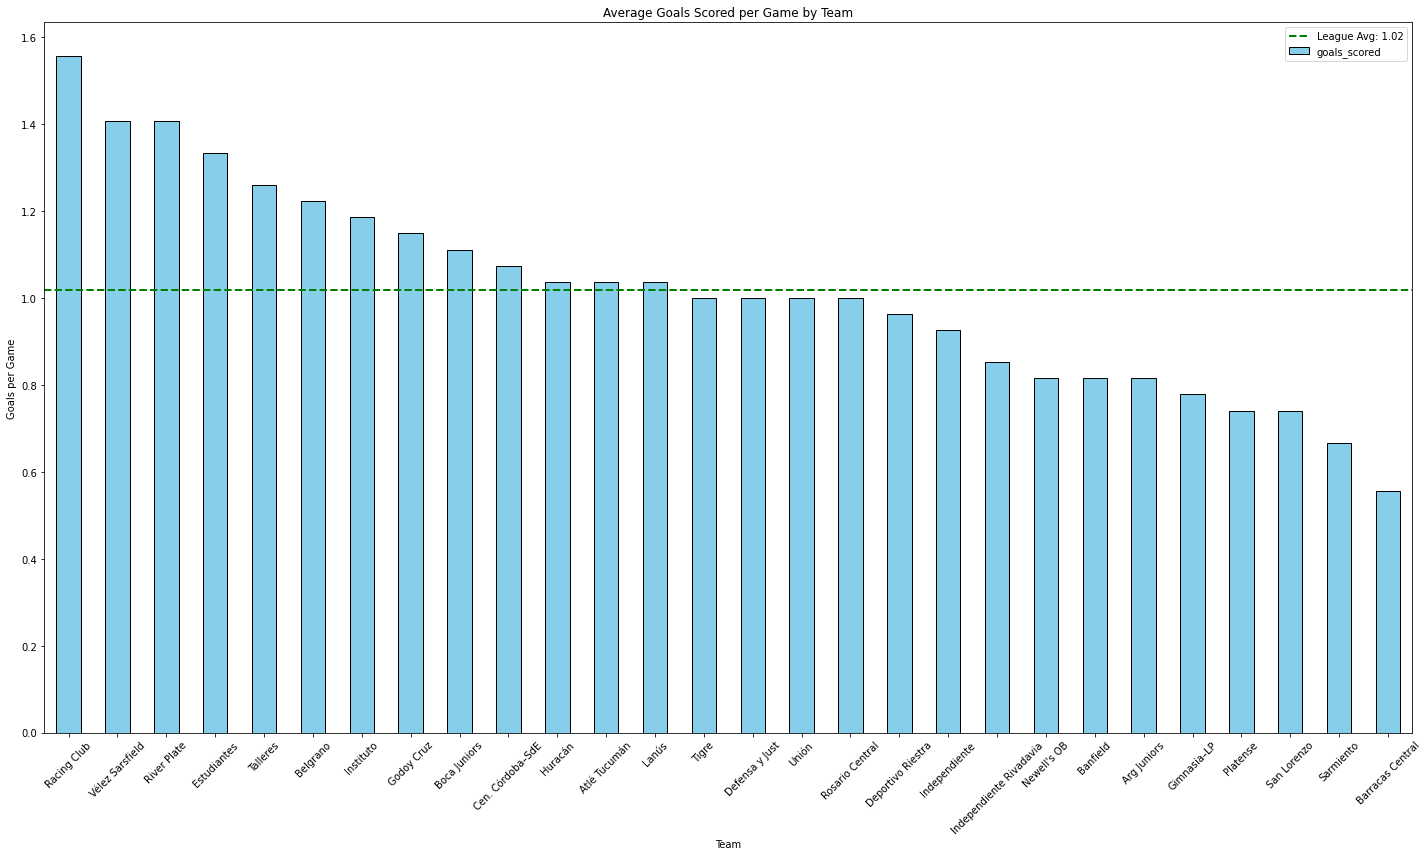

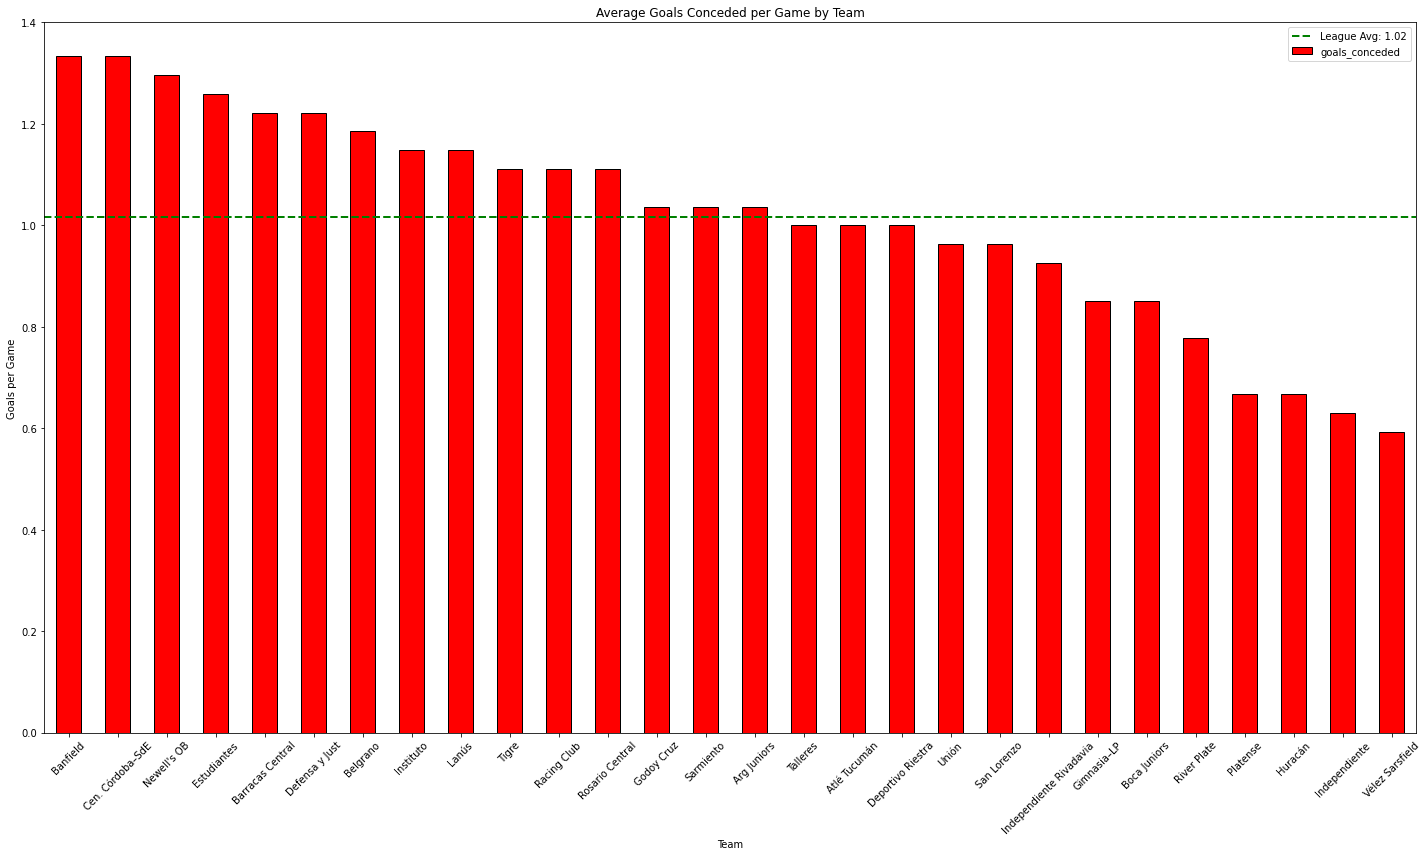

In [52]:
#plotting avg goals scored per team 

# Sum of goals scored for each team
goals_scored_sum = df.groupby('team')['goals_scored'].sum()

# Total number of games per team (assuming all teams play 27 games)
games_played = 27

# Calculate average goals scored per game
avg_goals_per_game = goals_scored_sum / games_played

# Calculate the league average
league_avg_goals = avg_goals_per_game.mean()

# Plotting
plt.figure(figsize=(20, 12))
avg_goals_per_game.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=league_avg_goals, color='green', linestyle='--', linewidth=2, label=f'League Avg: {league_avg_goals:.2f}')
plt.title('Average Goals Scored per Game by Team')
plt.ylabel('Goals per Game')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#plotting avg goals conceded for each team 

# Sum of goals scored for each team
goals_conceded_sum = df.groupby('team')['goals_conceded'].sum()

# Calculate average goals scored per game
avg_goals_conceded_per_game = goals_conceded_sum / games_played

# Calculate the league average
league_avg_goals_conceded = avg_goals_conceded_per_game.mean()

# Plotting
plt.figure(figsize=(20, 12))
avg_goals_conceded_per_game.sort_values(ascending=False).plot(kind='bar', color='red', edgecolor='black')
plt.axhline(y=league_avg_goals_conceded, color='green', linestyle='--', linewidth=2, label=f'League Avg: {league_avg_goals_conceded:.2f}')
plt.title('Average Goals Conceded per Game by Team')
plt.ylabel('Goals per Game')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




/var/folders/pw/hqp2f14x59vdps8403ppbt400000gn/T/ipykernel_41193/3270160727.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  goals_per_game_by_formation = df.groupby('formation').apply(lambda x: x['goals_scored'].sum() / x['game_id'].nunique())


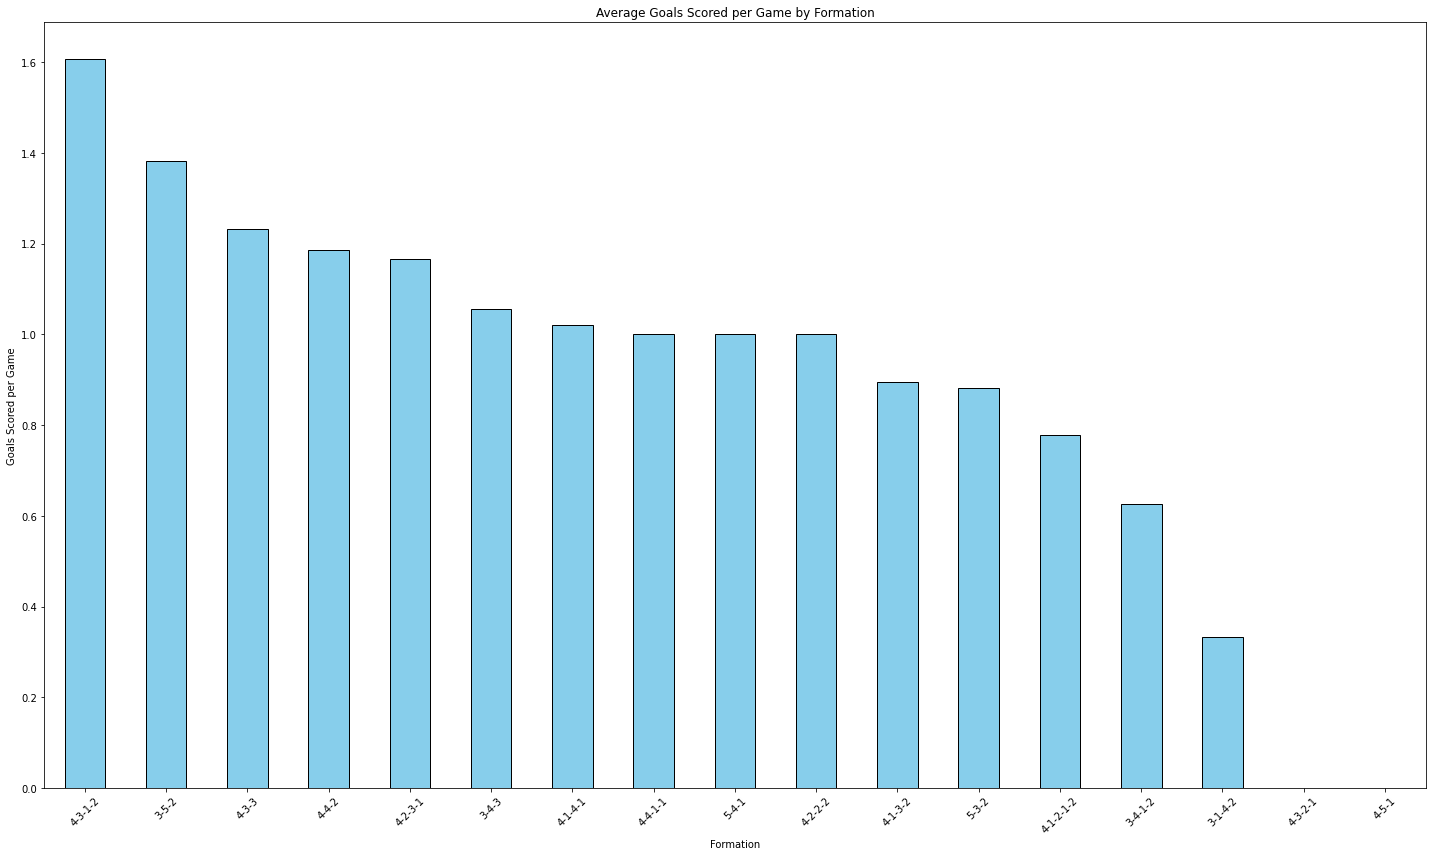

In [53]:
# Calculate goals scored per game by formation
goals_per_game_by_formation = df.groupby('formation').apply(lambda x: x['goals_scored'].sum() / x['game_id'].nunique())

# Plotting
plt.figure(figsize=(20, 12))
goals_per_game_by_formation.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Goals Scored per Game by Formation')
plt.ylabel('Goals Scored per Game')
plt.xlabel('Formation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


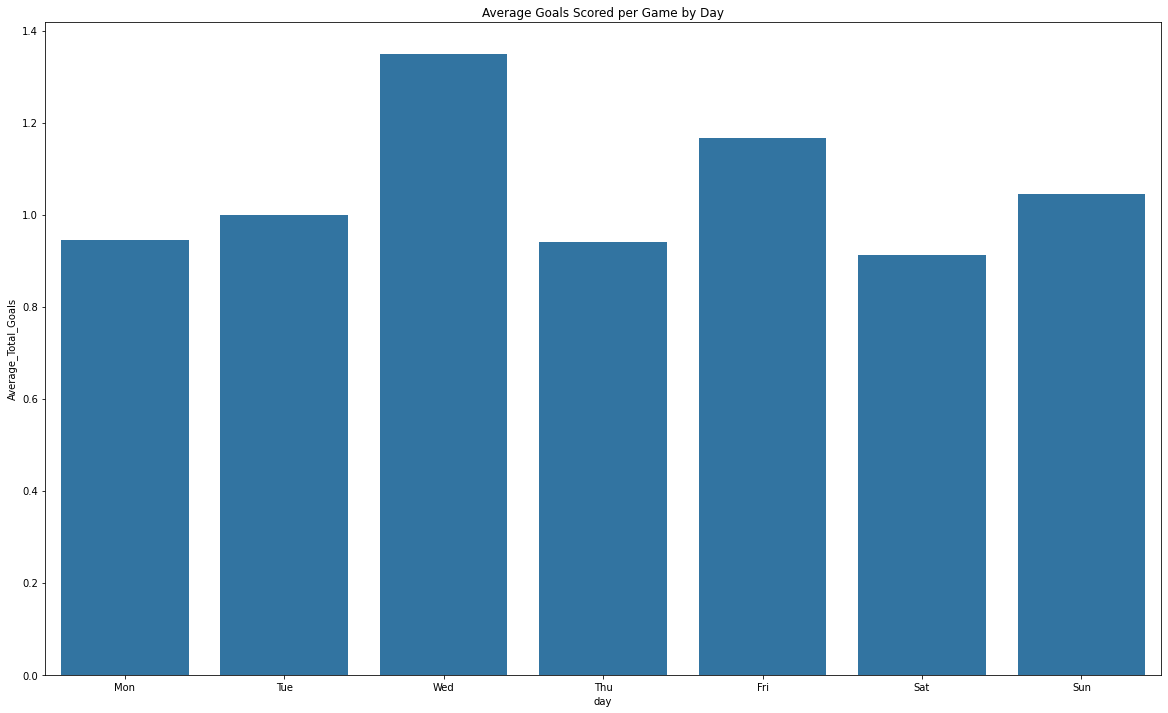

In [54]:
# Plot average total goals per game by day
avg_goals_by_day = temp_df.groupby('day').agg(Average_Total_Goals=('goals_scored', 'mean')).reset_index()
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_goals_by_day['day'] = pd.Categorical(avg_goals_by_day['day'], categories=day_order, ordered=True)
avg_goals_by_day = avg_goals_by_day.sort_values('day')

plt.figure(figsize=(20, 12))
sns.barplot(data=avg_goals_by_day, x='day', y='Average_Total_Goals')
plt.title('Average Goals Scored per Game by Day')
plt.show()

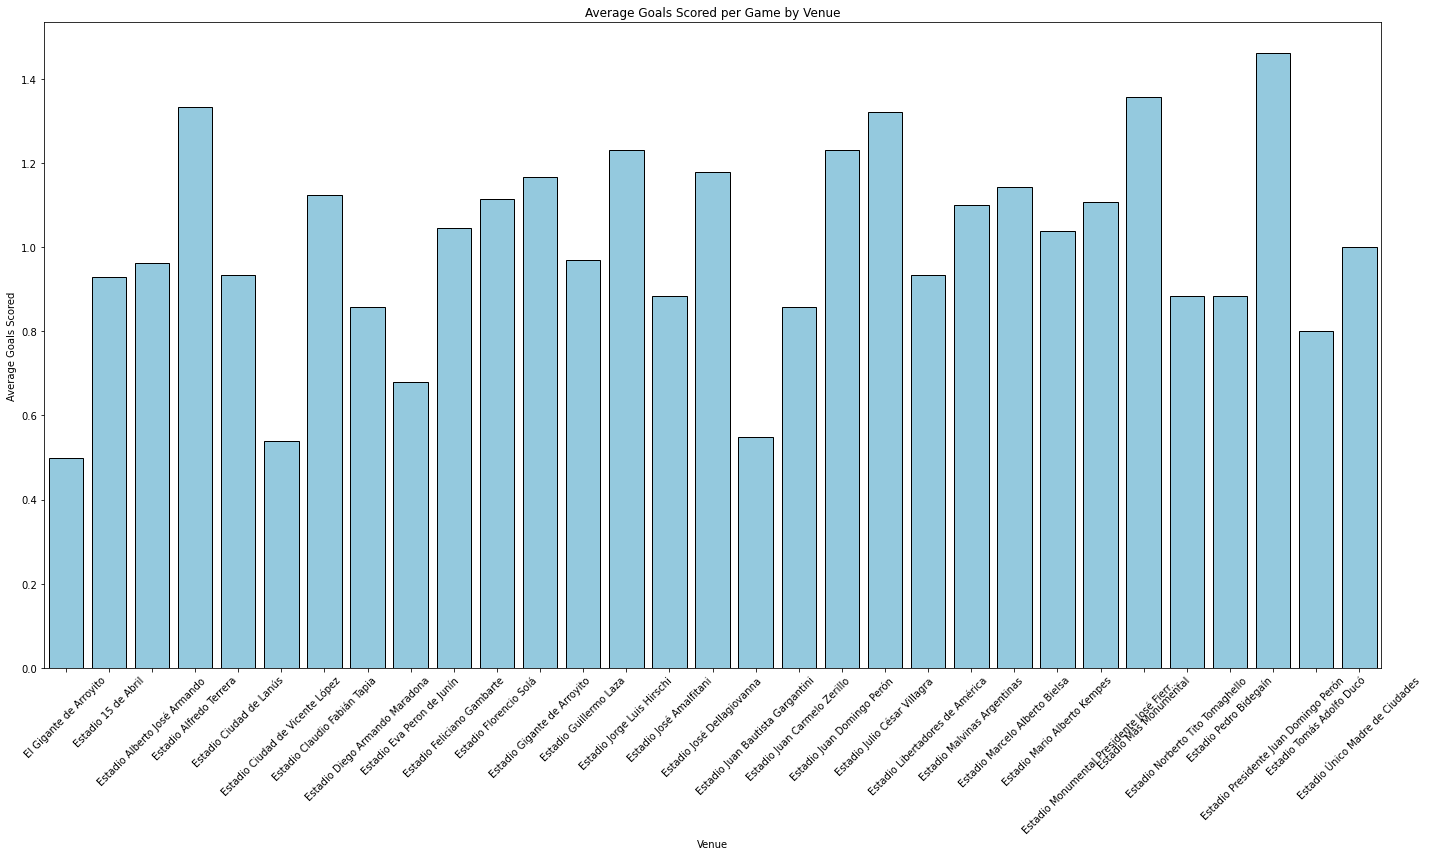

In [51]:
# Group by 'venue' and calculate the average total goals scored per venue
avg_goals_by_venue = temp_df.groupby('venue').agg(Average_Goals_Scored=('goals_scored', 'mean')).reset_index()

# Plotting
plt.figure(figsize=(20, 12))
sns.barplot(data=avg_goals_by_venue, x='venue', y='Average_Goals_Scored', color='skyblue', edgecolor='black')
plt.title('Average Goals Scored per Game by Venue')
plt.ylabel('Average Goals Scored')
plt.xlabel('Venue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
